# Pandas 
Formålet er at øge kendskabet til pandas dataframes og nogle praktiske metoder. Pandas er et 'must', hvis man bruger Python til at arbejde data, som er systematiseret og struktureret i rækker og kolonner.

Vi har nogle to mapper med eventyr, og vi arbejder hen imod at på teksterne samlet i en dataframe. Når vi har samlet teksterne der vil vi begynde at undersøge dem.

In [313]:
# importer bibliotekerne
import os
from pathlib import Path
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Definer stien til mappen med Grimms eventyr

In [334]:
# sti til mappen med Grimms eventyr
text_folder = Path.cwd() / '../data/txt_files/grimm'
text_files = os.listdir(text_folder)

## Gem titlerne i en liste

In [338]:
titles = []
for i in text_files:
    title = str(i[:-4])
    titles.append(title)

print (f'Total antal titler : {len(titles)}.\nTitlerne er: \n{titles}')

Total antal titler : 62.
Titlerne er: 
['ASHPUTTEL', 'BRIAR ROSE', 'CAT AND MOUSE IN PARTNERSHIP', 'CAT-SKIN', 'CLEVER ELSIE', 'CLEVER GRETEL', 'CLEVER HANS', 'DOCTOR KNOWALL', 'FREDERICK AND CATHERINE', 'FUNDEVOGEL', 'HANS IN LUCK', 'HANSEL AND GRETEL', 'IRON HANS', 'JORINDA AND JORINDEL', 'KING GRISLY-BEARD', 'LILY AND THE LION', 'LITTLE RED-CAP [LITTLE RED RIDING HOOD]', 'MOTHER HOLLE', 'OLD SULTAN', 'RAPUNZEL', 'RUMPELSTILTSKIN', 'SNOW-WHITE AND ROSE-RED', 'SNOWDROP', 'SWEETHEART ROLAND', 'THE ADVENTURES OF CHANTICLEER AND PARTLET', 'THE BLUE LIGHT', 'THE DOG AND THE SPARROW', 'THE ELVES AND THE SHOEMAKER', 'THE FISHERMAN AND HIS WIFE', 'THE FOUR CLEVER BROTHERS', 'THE FOX AND THE CAT', 'THE FOX AND THE HORSE', 'THE FROG-PRINCE', 'THE GOLDEN BIRD', 'THE GOLDEN GOOSE', 'THE GOOSE-GIRL', 'THE JUNIPER-TREE', 'THE KING OF THE GOLDEN MOUNTAIN', 'THE LITTLE PEASANT', 'THE MISER IN THE BUSH', 'THE MOUSE, THE BIRD, AND THE SAUSAGE', 'THE OLD MAN AND HIS GRANDSON', 'THE PINK', 'THE QUEEN BE

## Åbn tekstern og gem dem i en liste

In [316]:
texts = []
for item in text_files:
    with open( text_folder / item, 'r', encoding='utf-8-sig') as f:
        text = f.read()
        texts.append(text)

## Gem data i en dataframe

In [339]:
df = pd.DataFrame({'title': titles,
                  'text':texts,
                  'author': 'Grimms'})

## Byg funktion af koden ovenfor og lav en dataframe med HCA's eventyr

Prøv at samle de forskellige kodestykker som 

In [ ]:
# sti til mappen med tekster
text_folder = Path.cwd() / '../data/txt_files/hca'
text_files = os.listdir(text_folder)

def build_df(text_files, author_name):
    titles = []
    for i in text_files:
        title = str(i[:-4])
        titles.append(title)

    texts = []
    for item in text_files:
        with open( text_folder / item, 'r', encoding='utf-8-sig') as f:
            text = f.read()
            texts.append(text)

    df = pd.DataFrame({'title': titles,
                      'text':texts,
                      'author': author_name})
    
    return df

df2 = build_df(text_files, 'hca')

In [336]:
# statistik på tekstlængde
df['text_len'] = df['text'].apply(lambda x :len(x))

# Visualisering af tekstlængde
Vi vil lave en visualisering af datafordelingen. Til dette skal vi bruge et histogram.

Vi skal finde ud af, hvor mange søljer vi skal have. Til at beregne dette bruger vi formlen antal søjler = log(n) / log(2), hvor n er antal af værdier.

Og vi skal finde ud af, hvor bredde søjlerne cirka skal være. søjleinddeling =(største værdi - mindste værdi ) /( antal søjler ). 

_Kilde: 
  Stjernholm Madsen, Birger., Birger Stjernholm Madsen, and Birger. Stjernholm Madsen. Statistik for ikke-statistikere. 1. udgave. Frederiksberg: Samfundslitteratur, 2008. Print._  

In [319]:
import numpy as np

# Number of columns
def n_columns(n):
    return round ( np.log(n) / np.log(2) )
   
    
print (f' Antal søjler er {n_columns( len(df))} og søljebredden er {round ( (data.max() - data.min()) / num_bins, -1 )}')

 Antal søjler er 6 og søljebredden er 3080.0


For at få nogle "pæne" tal runder vi søjlebredden op til nærmeste 10'er og bruger seaborn bibliotekets histplot.

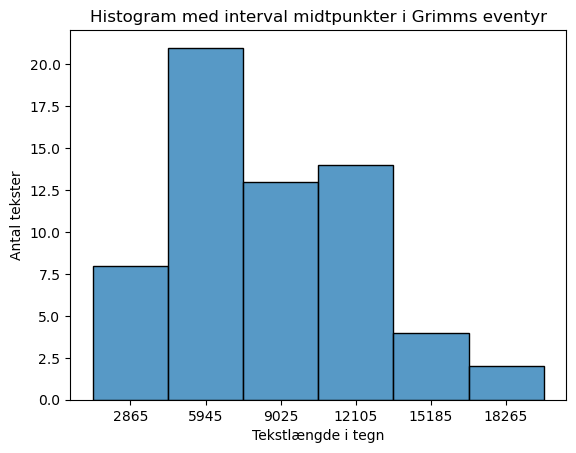

In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from your data
data = df['text_len']

# Calculate the number of bins
num_bins = 6

# Calculate the width of each bin - round to nearest 10
bin_width = round ( (data.max() - data.min()) / num_bins, -1 )

# Calculate the interval midpoints
interval_midpoints = [data.min() + (i + 0.5) * bin_width for i in range(num_bins)]

# Create a histogram using Seaborn with custom bin edges
hist = sns.histplot(data=data, bins=num_bins)

# Set labels and title
plt.xlabel('Tekstlængde i tegn')
plt.ylabel('Antal tekster')
author = df.at[0, 'author']
plt.title(f'Histogram med interval midtpunkter i {author} eventyr')

# Set the x-axis ticks to display interval midpoints
hist.set_xticks(interval_midpoints)

# Show the plot
plt.show()

# Byg funktion af koden ovenfor og lav en dataframe med HCA's eventyr

In [321]:
# sti til mappen med tekster
text_folder = Path.cwd() / '../data/txt_files/hca'
text_files = os.listdir(text_folder)

def build_df(text_files, author_name):
    titles = []
    for i in text_files:
        title = str(i[:-4])
        titles.append(title)

    texts = []
    for item in text_files:
        with open( text_folder / item, 'r', encoding='utf-8-sig') as f:
            text = f.read()
            texts.append(text)

    df = pd.DataFrame({'title': titles,
                      'text':texts,
                      'author': author_name})
    
    return df

df2 = build_df(text_files, 'hca')

# statistik på tekstlængde
df2['text_len'] = df2['text'].apply(lambda x :len(x))

# pd.concat()
Tilføj rækker fra en dataframe til en anden

In [322]:
new_df = pd.concat([df, df2])

In [323]:
# Visualisering af tekstlængde til sammenligning

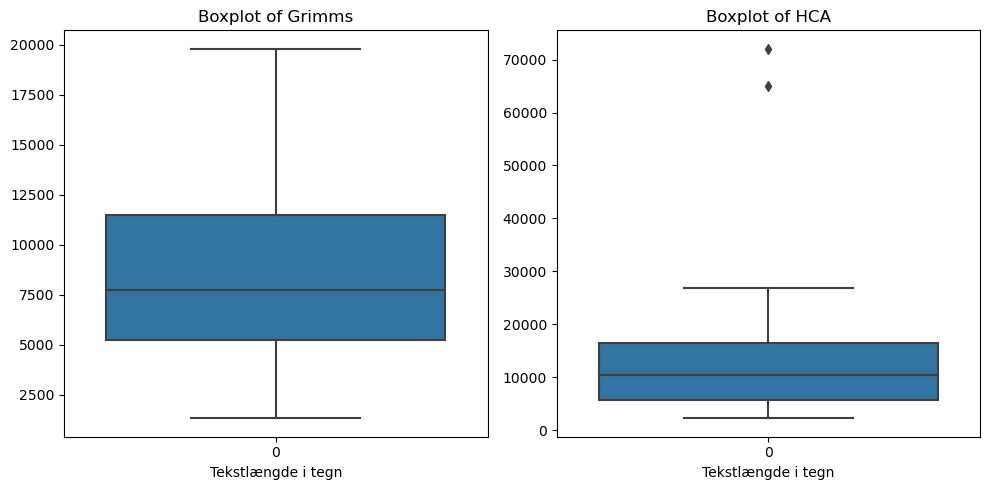

In [324]:
# Byg to serier
data1 = new_df[new_df['author'] == 'Grimms']['text_len']

data2 = new_df[new_df['author'] == 'hca']['text_len']


# figur og to subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Lav et boxplot subplots vha Seaborn
sns.boxplot(data=data1, ax=axes[0])
sns.boxplot(data=data2, ax=axes[1])

# Tilføj titler 
axes[0].set_title('Boxplot of Grimms')
axes[0].set_xlabel('Tekstlængde i tegn')
axes[1].set_title('Boxplot of HCA')
axes[1].set_xlabel('Tekstlængde i tegn')

#Vis plottet
plt.tight_layout()
plt.show()

In [325]:
def remove_outliers_IQR(data_frame, column_name):
    """
    Remove outliers from a column in a pandas DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    data_frame (pandas.DataFrame): A pandas DataFrame.
    column_name (str): The name of the column containing numerical data.

    Returns:
    pandas.DataFrame: A DataFrame with outliers removed.
    """

    # Extract the specified column as a Series
    data_series = data_frame[column_name]

    # Calculate the first quartile (Q1) and the third quartile (Q3)
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = q3 - q1

    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Select data points that are not outliers based on the bounds
    not_outliers_df = data_frame[(data_frame[column_name] > lower_bound) & (data_frame[column_name] < upper_bound)]

    return not_outliers_df

In [326]:
new_hca = remove_outliers_IQR(df2, 'text_len').reset_index(drop=True)

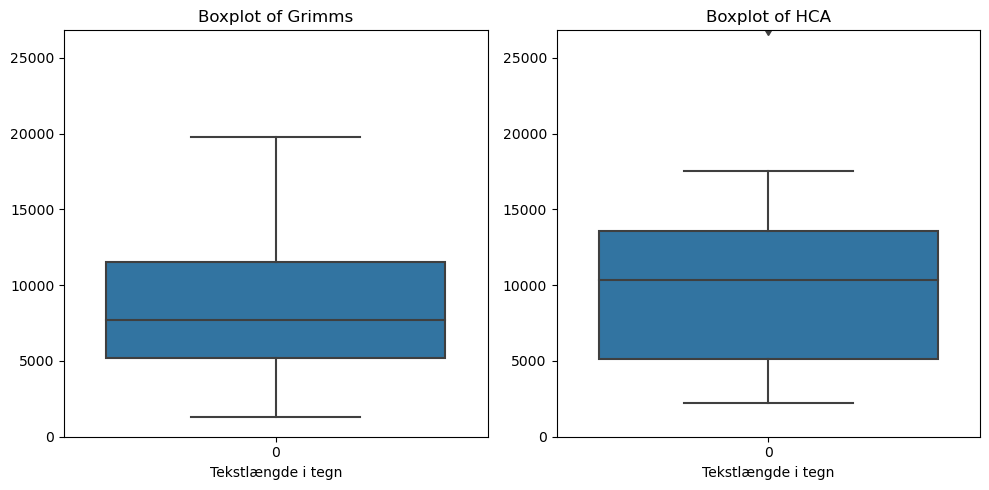

In [327]:
# Byg to serier
data1 = new_df[new_df['author'] == 'Grimms']['text_len']

data2 = new_hca[new_hca['author'] == 'hca']['text_len']


# figur og to subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Lav et boxplot subplots vha Seaborn
sns.boxplot(data=data1, ax=axes[0])
sns.boxplot(data=data2, ax=axes[1])

# Tilføj titler 
axes[0].set_title('Boxplot of Grimms')
axes[0].set_xlabel('Tekstlængde i tegn')
axes[1].set_title('Boxplot of HCA')
axes[1].set_xlabel('Tekstlængde i tegn')

# Manuel indstilling af y-aksens grænser til tvinge visualiseringne til at være ens på begge subplots
y_max = max(data1.max(), data2.max())
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)

#Vis plottet
plt.tight_layout()
plt.show()

In [328]:
# The number of occurences of our search term.

search_term = 'bird'

hits1 = new_df['text'].str.count(search_term).sum()

# The total number of words.
total1 = new_df['text'].str.split().str.len().sum()

# Relative frequency calculation
rf1 = hits1 / total1

print(rf1)


### Build as a function

def rel_freq(data_frame, column_name, search_term):
   

    hits1 = data_frame[column_name].str.count(search_term).sum()

    # The total number of words.
    total1 = data_frame[column_name].str.split().str.len().sum()

    # Relative frequency calculation
    rf1 = ( hits1 / total1 ) * 100000

    return rf1


rel_freq(new_df, 'text', 'bird')

0.0010795694728969532


107.95694728969532

In [329]:
fairy_tale_animals = [
    "swan", "swans",
    "mermaid", "mermaids",
    "nightingale", "nightingales",
    "duck", "ducks",
    "fish", "fish",
    "butterfly", "butterflies",
    "beetle", "beetles",
    "swallow", "swallows",
    "dolphin", "dolphins",
    "seahorse", "seahorses",
    "wolf", "wolves",
    "frog", "frogs",
    "donkey", "donkeys",
    "raven", "ravens",
    "bird", "birds",
    "cat", "cats",
    "mouse", "mice",
    "fox", "foxes",
    "horse", "horses",
    "pig", "pigs",
    "bear", "bears",
    "lion", "lions",
    "snake", "snakes"
]


for i in fairy_tale_animals:
    #rf = rel_freq( new_df , 'text', i) 
    rf = round ( rel_freq( new_df[new_df['author'] == 'hca'] , 'text', i), 4 )
    print (f'Relativ frequence of {i}: {rf}')

Relativ frequence of swan: 3.7655
Relativ frequence of swans: 3.7655
Relativ frequence of mermaid: 0.0
Relativ frequence of mermaids: 0.0
Relativ frequence of nightingale: 9.4137
Relativ frequence of nightingales: 0.0
Relativ frequence of duck: 0.0
Relativ frequence of ducks: 0.0
Relativ frequence of fish: 9.4137
Relativ frequence of fish: 9.4137
Relativ frequence of butterfly: 0.0
Relativ frequence of butterflies: 0.0
Relativ frequence of beetle: 0.0
Relativ frequence of beetles: 0.0
Relativ frequence of swallow: 9.4137
Relativ frequence of swallows: 5.6482
Relativ frequence of dolphin: 0.0
Relativ frequence of dolphins: 0.0
Relativ frequence of seahorse: 0.0
Relativ frequence of seahorses: 0.0
Relativ frequence of wolf: 0.0
Relativ frequence of wolves: 1.8827
Relativ frequence of frog: 16.9447
Relativ frequence of frogs: 1.8827
Relativ frequence of donkey: 0.0
Relativ frequence of donkeys: 0.0
Relativ frequence of raven: 3.7655
Relativ frequence of ravens: 1.8827
Relativ frequence of

In [330]:
# Use function with apply

In [331]:
# Opdeling af tekster
def segmenter(text):
    paragraphs = text.split('.')
    return  paragraphs

new_df['paragraphs'] = new_df['text'].apply(lambda x : segmenter (x)) 

# use .iterrows()

In [333]:
search_term = ''
def get_paragraphs(data_frame, search_term):
    # Iterate over rows using iterrows()
    for index, row in data_frame.iterrows():
        for p in row['paragraphs']:
            if search_term in p:
                au = row['author']
                ti = row['title']
                print ('*'*20)
                print (f'In {au.upper()} fairy tail {ti} the word {search_term.upper()} is in this paragraphs:\n {p}')
                print ('\n')
                

get_paragraphs(new_df, 'nightingale')

********************
In GRIMMS fairy tail JORINDA AND JORINDEL the word NIGHTINGALE is in this paragraphs:
  Jorindel turned to see the reason, and

beheld his Jorinda changed into a nightingale, so that her song ended

with a mournful _jug, jug_


********************
In GRIMMS fairy tail JORINDA AND JORINDEL the word NIGHTINGALE is in this paragraphs:
 



She mumbled something to herself, seized the nightingale, and went away

with it in her hand


********************
In GRIMMS fairy tail JORINDA AND JORINDEL the word NIGHTINGALE is in this paragraphs:
  Poor Jorindel saw the nightingale was gone--but

what could he do? He could not speak, he could not move from the spot

where he stood


********************
In GRIMMS fairy tail JORINDA AND JORINDEL the word NIGHTINGALE is in this paragraphs:
  He looked around at

the birds, but alas! there were many, many nightingales, and how then

should he find out which was his Jorinda? While he was thinking what to

do, he saw the fairy had